In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
pd.__version__
from sklearn import preprocessing


In [2]:
loan_2015 = pd.read_csv('data/2015.csv')
loan_2014 = pd.read_csv('data/2013-2014.csv')
loan_2013 = pd.read_csv('data/2012-2013.csv')


/Users/tedcheng/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/tedcheng/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
all_loan = pd.concat([loan_2013, loan_2014, loan_2015])

all_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,10149342,12000897,27050,27050,27050,36 months,10.99%,885.46,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,59900,NaN,NaN,NaN
1,10159584,12011200,9750,9750,9750,36 months,13.98%,333.14,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,15100,NaN,NaN,NaN
2,10159498,1319523,12000,12000,12000,36 months,6.62%,368.45,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,61100,NaN,NaN,NaN
3,10139658,11991209,12000,12000,12000,36 months,13.53%,407.40,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,8100,NaN,NaN,NaN
4,10159548,12011167,15000,15000,15000,36 months,8.90%,476.30,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,15400,NaN,NaN,NaN
5,10119623,11971241,12000,12000,12000,36 months,11.99%,398.52,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,16200,NaN,NaN,NaN
6,10129477,11981093,14000,14000,14000,36 months,12.85%,470.71,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,4500,NaN,NaN,NaN
7,10129403,11981032,7550,7550,7550,36 months,16.24%,266.34,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,8000,NaN,NaN,NaN
8,10159611,12011228,10000,10000,10000,36 months,9.67%,321.13,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,22300,NaN,NaN,NaN
9,10179520,12031088,3000,3000,3000,36 months,12.85%,100.87,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,5300,NaN,NaN,NaN


In [4]:
transposed = all_loan.describe().transpose()
transposed[transposed['count']!=0]

,count,mean,std,min,25%,50%,75%,max
member_id,714343,30851030.871181,20595836.229113,70825.00,10850115.500,31055795.00,49650016.500,65115331.00000
loan_amnt,714343,14906.689538,8403.529194,1000.00,8400.000,13200.00,20000.000,35000.00000
funded_amnt,714343,14906.025817,8403.024119,1000.00,8400.000,13200.00,20000.000,35000.00000
funded_amnt_inv,714343,14899.093359,8399.586515,925.00,8400.000,13200.00,20000.000,35000.00000
installment,714343,443.461410,243.997531,21.62,267.110,389.15,579.540,1424.57000
annual_inc,714343,74724.160560,59398.178476,3000.00,45000.000,64575.00,90000.000,9500000.00000
dti,714343,18.211431,8.211788,0.00,12.050,17.74,24.020,39.99000
delinq_2yrs,714343,0.317621,0.866436,0.00,0.000,0.00,0.000,39.00000
inq_last_6mths,714343,0.692141,0.974161,0.00,0.000,0.00,1.000,8.00000
mths_since_last_delinq,349949,34.022269,21.843819,0.00,15.000,31.00,50.000,188.00000


In [5]:
all_loan['int_rate_num'] = [float(str(t).replace("%", ""))/100 for t in all_loan.int_rate]
all_loan.int_rate_num


0         0.1099
1         0.1398
2         0.0662
3         0.1353
4         0.0890
5         0.1199
6         0.1285
7         0.1624
8         0.0967
9         0.1285
10        0.0762
11        0.0762
12        0.1997
13        0.1498
14        0.1353
15        0.1099
16        0.2290
17        0.1447
18        0.1099
19        0.1099
20        0.1353
21        0.0762
22        0.1199
23        0.1922
24        0.1624
25        0.1099
26        0.1398
27        0.2050
28        0.1398
29        0.1398
           ...  
290563    0.1366
290564    0.1599
290565    0.1786
290566    0.1144
290567    0.1786
290568    0.0819
290569    0.1559
290570    0.1599
290571    0.1559
290572    0.0867
290573    0.0603
290574    0.0819
290575    0.0949
290576    0.0603
290577    0.1431
290578    0.1649
290579    0.0649
290580    0.1499
290581    0.0867
290582    0.1924
290583    0.0949
290584    0.1559
290585    0.1199
290586    0.1199
290587    0.1199
290588    0.1599
290589    0.1999
290590    0.11

In [6]:
# if value is float, fill in blank wiht mean, otherwise fill in with sample data
features = ['loan_amnt', 'term', 
       'emp_length', 'home_ownership', 'annual_inc',
       'pymnt_plan','purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
        'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'acc_now_delinq','total_rev_hi_lim']
for col in features:
    if all_loan[col].dtype == 'float64':
        all_loan[col].fillna(all_loan[col].mean(), inplace=True)
    else:
        all_loan[col].fillna(all_loan[col].sample(), inplace=True)


In [7]:
all_loan[features].isnull().any()

loan_amnt           False
term                 True
emp_length           True
home_ownership       True
annual_inc          False
pymnt_plan           True
purpose              True
dti                 False
delinq_2yrs         False
inq_last_6mths      False
open_acc            False
pub_rec             False
revol_bal           False
revol_util           True
total_acc           False
acc_now_delinq      False
total_rev_hi_lim    False
dtype: bool

In [8]:
subset = all_loan.sample(10000)
y_sub = subset[~subset.int_rate_num.isnull()].int_rate_num
X_sub = pd.get_dummies(subset.ix[~subset.int_rate_num.isnull(), features])
all_loan.count


<bound method DataFrame.count of                                                       id  member_id  \
0                                               10149342   12000897   
1                                               10159584   12011200   
2                                               10159498    1319523   
3                                               10139658   11991209   
4                                               10159548   12011167   
5                                               10119623   11971241   
6                                               10129477   11981093   
7                                               10129403   11981032   
8                                               10159611   12011228   
9                                               10179520   12031088   
10                                              10148122   11999781   
11                                              10149577   12001118   
12                                          

In [9]:
scaler = preprocessing.StandardScaler()
X_sub_scaled = scaler.fit_transform(X_sub)



In [10]:
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub_scaled, y_sub)

X_sub_test.shape

(2500, 1063)

In [14]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge
parameters = {"alpha": [0.1, 1, 10, 100]}
clf = GridSearchCV(Ridge(), param_grid  = parameters)
clf.fit(X_sub_train, y_sub_train)
clf.score(X_sub_test, y_sub_test)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 100}
0.319891767579


In [17]:
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
parameters = {"alpha": [0.1, 1, 10, 100]}
clf = GridSearchCV(linear_model.Lasso(), param_grid  = parameters)
clf.fit(X_sub_train, y_sub_train)
clf.score(X_sub_test, y_sub_test)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.1}
-0.00149948710016


{'alpha': 0.1}

In [18]:
y = all_loan[~all_loan.int_rate_num.isnull()].int_rate_num
X = pd.get_dummies(all_loan.ix[~all_loan.int_rate_num.isnull(), features])


In [19]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)





In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [21]:
X_train.shape

(535757, 1287)

In [22]:
# Ridge: alpha = 100
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)


Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

-9.4717563934310078e-06

In [23]:
# R-sqaured
ridge_model.score(X_test,y_test)

0.42709751908624716

In [48]:
pred = ridge_model.predict(X_test)

In [49]:
actual = y_test

In [84]:
# Prediction within 20% of true values

(abs((pred - actual)/actual) < 0.25).value_counts()

True     101651
False     76935
dtype: int64

In [26]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(actual, pred)

0.0011702764828227252

In [45]:
# Quantiles of errors
(abs((pred - actual)/actual)).quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9])

0.10    0.032030
0.20    0.064515
0.30    0.097952
0.40    0.133245
0.50    0.171611
0.75    0.299075
0.90    0.477076
dtype: float64

In [26]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# R-squared
lasso_model.score(X_test,y_test)

-9.4717563934310078e-06

In [82]:
pred = lasso_model.predict(X_test)
actual = y_test

# Prediction within 20% of true values

(abs((pred - actual)/actual) < 0.25).value_counts()

True     102289
False     76297
dtype: int64

In [30]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(actual, pred)

0.0019511753722278287

In [31]:
# Quantiles of errors

(abs((pred - actual)/actual)).quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9])


0.10    0.038449
0.20    0.079219
0.30    0.118913
0.40    0.169944
0.50    0.227429
0.75    0.397792
0.90    0.709689
dtype: float64

In [ ]:
#Summary
# R-squared
# Ridge: 0.40559881947003373
# Lasso: 0.021172606319151743

# Mean Squared Error
# Ridge: 0.0011702764828227252
# Lasso: 0.0019271473830957655

# Prediction within 20% of true values
# Ridge: 
#  True     101359
#  False     77227

# Lasso: 
#  True     87092
#  False    91494
 
# Quantiles of errors
# Ridge: 
# 0.10    0.032030
# 0.20    0.064515
# 0.30    0.097952
# 0.40    0.133245
# 0.50    0.171611
# 0.75    0.299075
# 0.90    0.477076

# Lasso: 
# 0.10    0.037324
# 0.20    0.075530
# 0.30    0.115512
# 0.40    0.158462
# 0.50    0.206229
# 0.75    0.375990
# 0.90    0.688798


In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [34]:
tree_model.score(X_test, y_test)


0.037643595173852962

In [83]:
pred = tree_model.predict(X_test)
actual = y_test

# Prediction within 20% of true values

(abs((pred - actual)/actual) < 0.25).value_counts()

True     101651
False     76935
dtype: int64

In [46]:
size = len(y_test)
pred = pd.DataFrame(index=range(0,size),columns=['lasso', 'ridge', 'tree'])
pred

,lasso,ridge,tree
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [52]:
pred.lasso = lasso_model.predict(X_test)
pred.ridge = ridge_model.predict(X_test)
pred.tree = tree_model.predict(X_test)
pred

,lasso,ridge,tree
0,0.134894,0.102366,0.0789
1,0.134894,0.175093,0.1999
2,0.134894,0.094647,0.1269
3,0.134894,0.158547,0.1699
4,0.134894,0.161399,0.1699
5,0.134894,0.113070,0.0818
6,0.134894,0.147216,0.1757
7,0.134894,0.126181,0.1433
8,0.134894,0.369971,0.1433
9,0.134894,0.120378,0.1561


In [81]:
avg_pred = pred.mean(axis=1)

actual = y_test
series_actual = actual.reset_index().int_rate_num

# # Prediction within 25% of true values

(abs((avg_pred - series_actual)/series_actual) < 0.25).value_counts()

True     115611
False     62975
dtype: int64

In [90]:
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


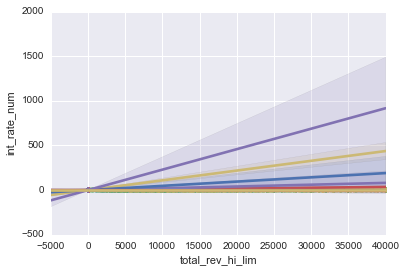

In [99]:
for f in features:
    if all_loan[f].dtype == 'float':
        print(sns.regplot(x=f, y="int_rate_num", data=all_loan.sample(1000)))